In [16]:
import pandas as pd 
import numpy as np 
import datetime
from pathlib import Path
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib.dates import DateFormatter, MO, TU, WE, TH, FR, SA, SU
from matplotlib.ticker import MaxNLocator
from matplotlib import lines
from matplotlib import patches
from matplotlib import rc
from matplotlib.patheffects import withStroke
import copy
from flexitext import flexitext

In [17]:
def mympl(vertical_chart=True, backround_color='#e8e8e8', font_family="serif"):
    
    if vertical_chart:
        mpl.rcParams['axes.spines.right'] = False
        mpl.rcParams['axes.spines.left'] = False
        mpl.rcParams['axes.spines.top'] = False
    else:
        mpl.rcParams['axes.spines.right'] = True
        mpl.rcParams['axes.spines.left'] = False
        mpl.rcParams['axes.spines.top'] = False
        mpl.rcParams['axes.spines.bottom'] = False
            
    mpl.rcParams['figure.facecolor'] = backround_color
    mpl.rcParams["axes.facecolor"] = backround_color
    mpl.rcParams["font.family"] = font_family
    mpl.rcParams["text.color"] = "#174978"

    
mympl() 

In [11]:
figsize = (12, 7)
GRIDLINE_COLOR = "#A8BAC4"

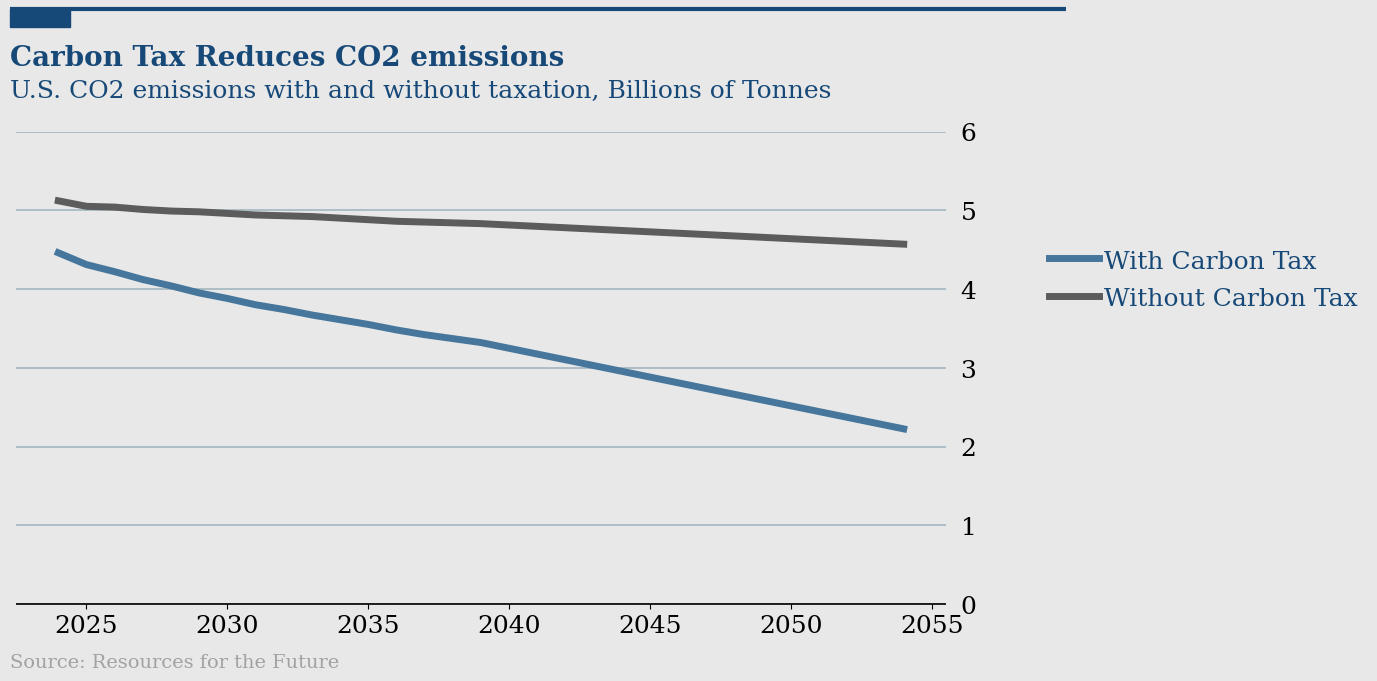

In [25]:
# TIME SERIES LINE GRAPH

carbon_data = pd.read_csv('data/carbon.csv')
carbon_data["Taxed Emissions"] = pd.to_numeric(carbon_data["Taxed Emissions"])
carbon_data["Normal Emissions"] = pd.to_numeric(carbon_data["Normal Emissions"])
carbon_data["year"] = pd.to_numeric(carbon_data["year"])

fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_axisbelow(True)
# ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
ax.grid(axis="y", color=GRIDLINE_COLOR, lw=1.3)
ax.plot(carbon_data['year'], 
        carbon_data['Taxed Emissions'], 
        color='#46769b',
        linewidth=5)
ax.plot(carbon_data['year'], 
        carbon_data['Normal Emissions'], 
        color='#5c5c5c',
        linewidth=5)


ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

ax.set_ylim(0, 6)

ax.xaxis.set_tick_params(labelsize=18)



ax.yaxis.set_tick_params(pad=7,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=18) 

source = 'Source: Resources for the Future'
fig.text(0.12, 0.06, source, color="#a2a2a2", fontsize=14)

fig.add_artist(lines.Line2D([0.12, 1], [1, 1], lw=3, color="#174978", solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0.12, 0.975), 0.05, 0.025, color="#174978"))
ax.legend(['With Carbon Tax', 'Without Carbon Tax'], loc=(1.1,0.6), ncol=1, frameon=False, handletextpad=.2, handleheight=1, prop={'size': 18})

fig.subplots_adjust(top=0.825, bottom=0.15)
fig.text(0.12, 0.92, "Carbon Tax Reduces CO2 emissions", fontsize=20,fontweight="bold")
# Add subtitle
fig.text(0.12, 0.875, "U.S. CO2 emissions with and without taxation, Billions of Tonnes", fontsize=18)
plt.savefig('graph_png/carbon.png',    # Set path and filename
            dpi = 600,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='#e8e8e8') 

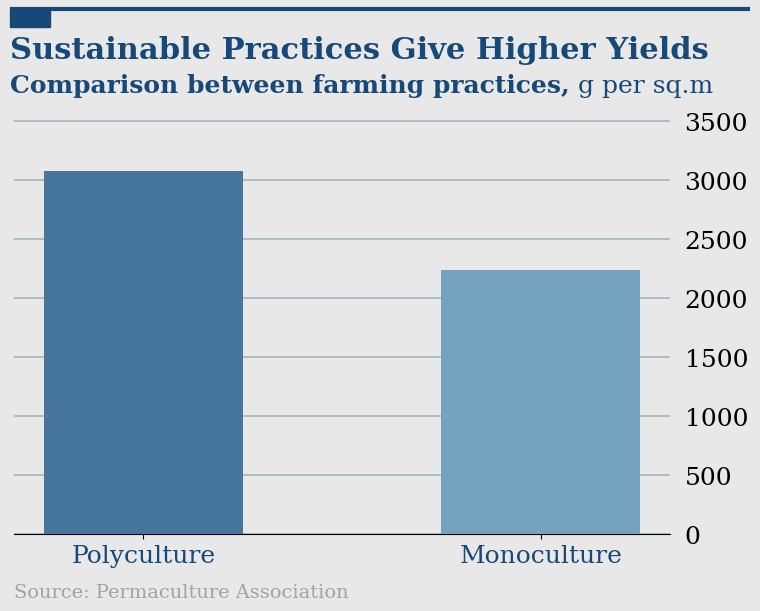

In [32]:
# BAR CHART

x_axis_names = ['Polyculture', 'Monoculture']
x_axis = np.arange(2)
responses = [3074.8, 2234.9]


x_max = 1.21
y_max = 4000
y_min = 0
number_y_ticks = 5


bar_width = .5
fig, ax = plt.subplots(figsize=(8, 7))
ax.grid(axis="y", color=GRIDLINE_COLOR, lw=1.3, zorder=0)
# first = ax.bar(x_axis, responses, bar_width, color="#174978", zorder=3)
ax.bar(x_axis_names[0], responses[0], bar_width, color='#46769b', zorder=3)
ax.bar(x_axis_names[1], responses[1], bar_width, color='#75a2bf', zorder=3)
ax.set_xticks(x_axis)
ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500])
ax.xaxis.set_ticklabels(x_axis_names, fontsize=16, fontweight=100, color="#174978")

ax.set_ylim(y_min, y_max)

#plt.setp(autotexts, size=16, weight="bold")
fig.subplots_adjust(top=0.825, bottom=0.15, left=.08)
source = 'Source: Permaculture Association'
fig.text(.08, 0.06, source, color="#a2a2a2", fontsize=14)

fig.add_artist(lines.Line2D([.075, 1], [.9, .9], lw=3, color="#174978", solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((.075, .875), 0.05, 0.025, color="#174978"))

ax.xaxis.set_tick_params(labelsize=18)



ax.yaxis.set_tick_params(pad=7,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=18,
                         ) 



# Add title
fig.text(.075, 0.83, "Sustainable Practices Give Higher Yields", fontsize=22,fontweight="bold")
# Add subtitle
text = "<name:serif, size:18><weight:bold>Comparison between farming practices, </>g per sq.m</>"
flexitext(-.006, .95, text, ax=ax)

plt.savefig('farm.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='#e8e8e8') 

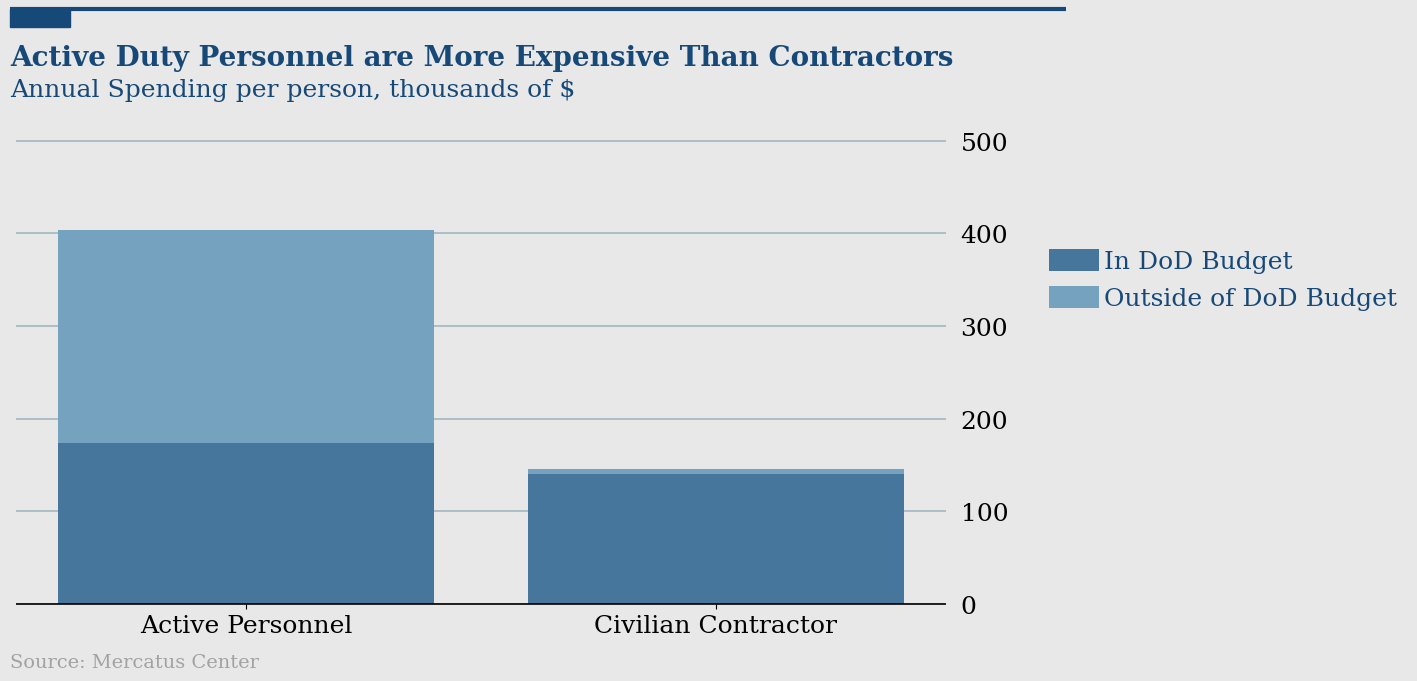

In [34]:
# STACKED BAR CHART


x = ['Active Personnel', 'Civilian Contractor']
in_dod = np.array([173.272, 140.052])
non_dod = np.array([230.638, 5.280])


fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_axisbelow(True)
ax.grid(axis="y", color=GRIDLINE_COLOR, lw=1.3)
ax.bar(x, in_dod, color='#46769b')
ax.bar(x, non_dod, bottom=in_dod, color='#75a2bf')

ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

ax.yaxis.set_tick_params(pad=7,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=18) 

ax.set_ylim(0, 510)

ax.xaxis.set_tick_params(labelsize=18)

source = 'Source: Mercatus Center'
fig.text(0.12, 0.06, source, color="#a2a2a2", fontsize=14)

fig.add_artist(lines.Line2D([0.12, 1], [1, 1], lw=3, color="#174978", solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0.12, 0.975), 0.05, 0.025, color="#174978"))

ax.legend(['In DoD Budget', 'Outside of DoD Budget'], loc=(1.1,0.6), ncol=1, frameon=False, handletextpad=.2, handleheight=1, prop={'size': 18})


fig.subplots_adjust(top=0.825, bottom=0.15)
fig.text(0.12, 0.92, "Active Duty Personnel are More Expensive Than Contractors", fontsize=20,fontweight="bold")
# Add subtitle
fig.text(0.12, 0.875, "Annual Spending per person, thousands of $", fontsize=18)

plt.savefig('defense.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='#e8e8e8') 